In [2]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.shape


(9800, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df = df.dropna(subset=['Postal Code'])


In [7]:
df.shape

(9789, 18)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     3955 non-null   datetime64[ns]
 3   Ship Date      3811 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [11]:
df[['Order Date', 'Ship Date']].isnull().sum()


Order Date    5834
Ship Date     5978
dtype: int64

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     3955 non-null   datetime64[ns]
 3   Ship Date      3811 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [14]:
df[['Order Date', 'Ship Date']].isnull().sum()


Order Date    5834
Ship Date     5978
dtype: int64

In [15]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df = df.dropna(subset=['Postal Code'])


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [17]:
df[['Order Date', 'Ship Date']].isnull().sum()


Order Date    0
Ship Date     0
dtype: int64

In [18]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()
df['Order Quarter'] = df['Order Date'].dt.to_period('Q')


In [19]:
df[['Order Date', 'Order Year', 'Order Month', 'Order Month Name', 'Order Quarter']].head()


,Order Date,Order Year,Order Month,Order Month Name,Order Quarter
0,2017-11-08,2017,11,November,2017Q4
1,2017-11-08,2017,11,November,2017Q4
2,2017-06-12,2017,6,June,2017Q2
3,2016-10-11,2016,10,October,2016Q4
4,2016-10-11,2016,10,October,2016Q4


In [20]:
region_sales = (
    df.groupby('Region')['Sales']
    .sum()
    .sort_values(ascending=False)
)

region_sales


Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

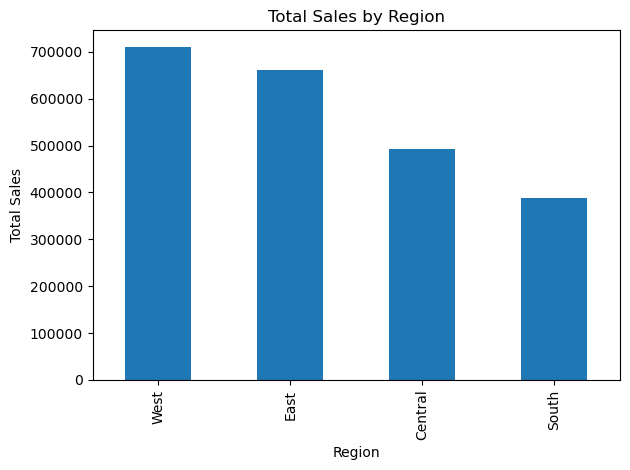

In [21]:
import matplotlib.pyplot as plt

region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [22]:
category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

category_sales


Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64

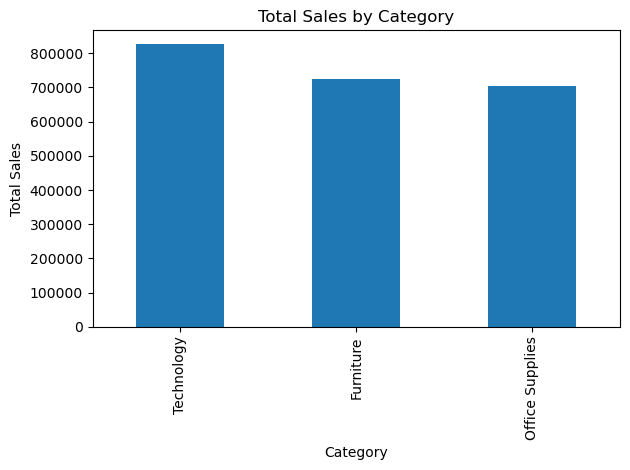

In [23]:
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


In [24]:
subcat_sales = (
    df.groupby('Sub-Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

subcat_sales.head(10)


Sub-Category
Phones         326487.6980
Chairs         322107.5310
Storage        217779.1020
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    163881.6900
Copiers        146248.0940
Bookcases      109408.2987
Appliances     104075.4630
Name: Sales, dtype: float64

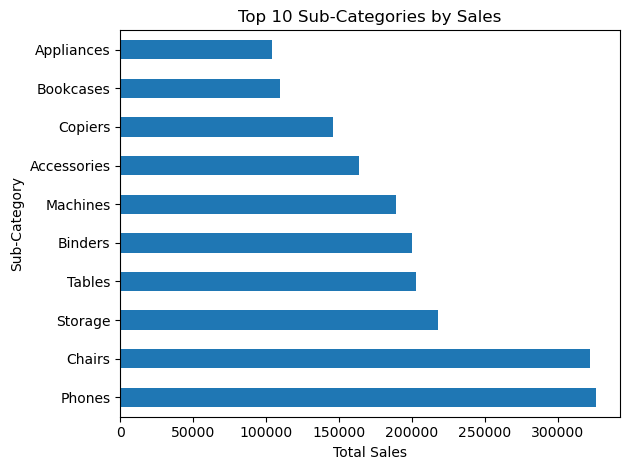

In [25]:
subcat_sales.head(10).plot(kind='barh')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


In [26]:
monthly_sales = (
    df.groupby(['Order Year', 'Order Month'])['Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()


,Order Year,Order Month,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


In [27]:
monthly_sales['Year_Month'] = pd.to_datetime(
    monthly_sales['Order Year'].astype(str) + '-' +
    monthly_sales['Order Month'].astype(str)
)


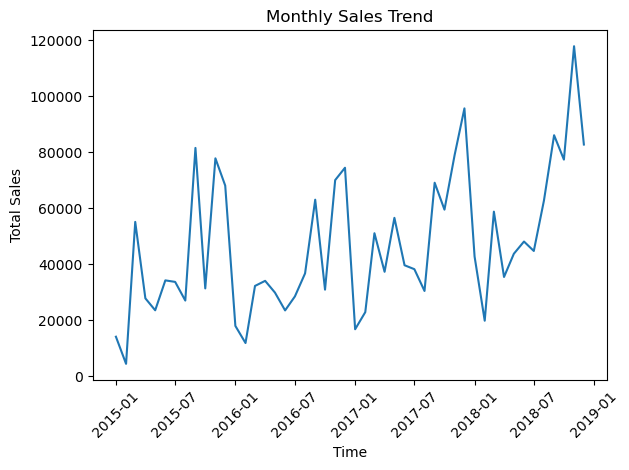

In [28]:
plt.figure()
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
top_customers = (
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
)

top_customers.head(10)


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

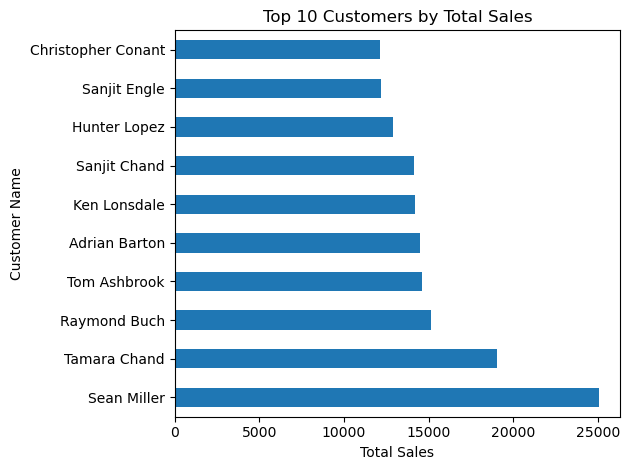

In [30]:
top_customers.head(10).plot(kind='barh')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()


In [31]:
df.to_csv('../data/train_utf8.csv', index=False, encoding='utf-8')


In [32]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.6 MB/s eta 0:00:001m40.6 MB/s eta 0:00:01


In [33]:
import pandas as pd
import mysql.connector


In [34]:
df = pd.read_csv('../data/train.csv')

df.shape


(9800, 18)

In [35]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


NameError: name 'cursor' is not defined

In [36]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",          # change if different
    password="YOUR_PASSWORD",
    database="sales_analysis"
)

cursor = conn.cursor()


ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)

In [37]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Dharmesh@18",   # 👈 your new password
    database="sales_analysis"
)

cursor = conn.cursor()



In [38]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


NameError: name 'insert_query' is not defined

In [39]:
insert_query = """
INSERT INTO superstore_sales (
    Row_ID,
    Order_ID,
    Order_Date,
    Ship_Date,
    Ship_Mode,
    Customer_ID,
    Customer_Name,
    Segment,
    Country,
    City,
    State,
    Postal_Code,
    Region,
    Product_ID,
    Category,
    Sub_Category,
    Product_Name,
    Sales
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""


In [40]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


DataError: 1292 (22007): Incorrect date value: '08/11/2017' for column 'Order_Date' at row 1

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')


ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [43]:
df[['Order Date', 'Ship Date']].isna().sum()


Order Date    5841
Ship Date     5985
dtype: int64

In [44]:
df = df.dropna(subset=['Order Date', 'Ship Date'])



In [45]:
df.shape


(2676, 18)

In [46]:
df[['Order Date', 'Ship Date']].isna().sum()


Order Date    0
Ship Date     0
dtype: int64

In [47]:
df.shape



(2676, 18)

In [48]:
insert_query = """
INSERT INTO superstore_sales (
    Row_ID, Order_ID, Order_Date, Ship_Date, Ship_Mode,
    Customer_ID, Customer_Name, Segment, Country, City,
    State, Postal_Code, Region, Product_ID, Category,
    Sub_Category, Product_Name, Sales
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()



ProgrammingError: 1054 (42S22): Unknown column 'nan' in 'field list'

In [49]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      4
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [50]:
df['Postal Code'] = df['Postal Code'].where(df['Postal Code'].notnull(), None)


In [51]:
df = df.where(pd.notnull(df), None)


In [52]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      4
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [53]:
df['Postal Code'] = df['Postal Code'].fillna('Unknown').astype(str)


In [54]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [55]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


In [56]:
import numpy as np

df['Postal Code'] = df['Postal Code'].replace({np.nan: None})


In [57]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [58]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date']  = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')


In [59]:
insert_query = """
INSERT INTO superstore_sales (
    Row_ID, Order_ID, Order_Date, Ship_Date, Ship_Mode,
    Customer_ID, Customer_Name, Segment, Country, City,
    State, Postal_Code, Region, Product_ID, Category,
    Sub_Category, Product_Name, Sales
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


In [60]:
for _, row in df.iterrows():
    cursor.execute(insert_query, tuple(row))

conn.commit()


In [61]:
df.to_csv('../data/final_superstore_clean.csv', index=False)
